In [7]:
!pip install bs4
from io import StringIO
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
from datetime import datetime
import json

In [49]:
# Base libraries already imported
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# Example: Electronics category URL
base_url = "https://www.banggood.com/custlink/category/Electronics"

# Empty list to store product data
products = []

# Loop through first 3 pages as an example
for page in range(1, 4):
    url = f"{base_url}?page={page}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find product containers (update the selector based on Banggood's site structure)
    items = soup.find_all("div", class_="product-card")  # Example class
    
    for item in items:
        name = item.find("a", class_="product-title").text.strip()
        price = item.find("span", class_="price-current").text.strip()
        rating = item.find("span", class_="rating-stars").get("data-rating", "0")
        reviews = item.find("span", class_="review-count").text.strip()
        link = item.find("a", class_="product-title")["href"]
        
        products.append({
            "Category": "Electronics",
            "Name": name,
            "Price": price,
            "Rating": rating,
            "Reviews": reviews,
            "URL": link
        })

# Convert to DataFrame
df = pd.DataFrame(products)
df.head()


""


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Categories URLs (example URLs, update as needed)
categories = {
    "Electronics": "https://www.banggood.com/marketing-Electronics-and-Appliance-Sale/tid-58139.html",
    "Toys": "https://www.banggood.com/custlink/category-Toys-Hobbies-Robot-586.html",
    "Fashion": "https://www.banggood.com/custlink/category-Men-and-Womens-Clothing-1580.html",
    "Sports": "https://www.banggood.com/custlink/category-Sports-Outdoors-1982.html",
    "Home_Garden": "https://www.banggood.com/custlink/category-Home-Garden-Furniture-3072.html"
}

print("Categories are set up.")


Categories are set up.


In [14]:
import pandas as pd
import json

# Sample JSON data (simulate what Banggood API would return)
data = [
    {
        "product_name": "Handsfree Bluetooth Car Kit",
        "product_price": "£23.22",
        "product_url": "https://www.banggood.com/example1.html",
        "product_score": 4.5,
        "product_review_count": 20
    },
    {
        "product_name": "Wireless Bluetooth Speaker",
        "product_price": "£45.50",
        "product_url": "https://www.banggood.com/example2.html",
        "product_score": 4.7,
        "product_review_count": 50
    }
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Clean price
df['Price'] = df['product_price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Save to CSV
df.to_csv("banggood_products.csv", index=False)
print(df.head())


                  product_name product_price  \
0  Handsfree Bluetooth Car Kit        £23.22   
1   Wireless Bluetooth Speaker        £45.50   

                              product_url  product_score  \
0  https://www.banggood.com/example1.html            4.5   
1  https://www.banggood.com/example2.html            4.7   

   product_review_count  Price  
0                    20  23.22  
1                    50  45.50  


In [17]:
import pandas as pd

# Assuming df already exists (from the 5-category sample data)

# Save CSV in current working directory
csv_path = "banggood_5categories.csv"
df.to_csv(csv_path, index=False)
print(f"CSV file saved at: {csv_path}")


CSV file saved at: banggood_5categories.csv


In [18]:
import pandas as pd

# Load CSV
df = pd.read_csv("banggood_5categories.csv")

# Inspect the data
print(df.head())
print(df.info())


          category                 product_name product_price  \
0      Electronics  Handsfree Bluetooth Car Kit        £23.22   
1      Electronics   Wireless Bluetooth Speaker        £45.50   
2      Electronics   Smartwatch Fitness Tracker        £60.00   
3  Home Appliances      Cordless Vacuum Cleaner       £120.99   
4  Home Appliances           Smart Air Purifier        £89.50   

                              product_url  product_score  \
0  https://www.banggood.com/example1.html            4.5   
1  https://www.banggood.com/example2.html            4.7   
2  https://www.banggood.com/example3.html            4.2   
3  https://www.banggood.com/example4.html            4.6   
4  https://www.banggood.com/example5.html            4.4   

   product_review_count   Price  
0                    20   23.22  
1                    50   45.50  
2                    30   60.00  
3                    40  120.99  
4                    25   89.50  
<class 'pandas.core.frame.DataFrame'>
RangeI

Sample with derived features:
          category                 product_name product_price  \
0      Electronics  Handsfree Bluetooth Car Kit        £23.22   
1      Electronics   Wireless Bluetooth Speaker        £45.50   
2      Electronics   Smartwatch Fitness Tracker        £60.00   
3  Home Appliances      Cordless Vacuum Cleaner       £120.99   
4  Home Appliances           Smart Air Purifier        £89.50   

                              product_url  product_score  \
0  https://www.banggood.com/example1.html            4.5   
1  https://www.banggood.com/example2.html            4.7   
2  https://www.banggood.com/example3.html            4.2   
3  https://www.banggood.com/example4.html            4.6   
4  https://www.banggood.com/example5.html            4.4   

   product_review_count   Price  Value_Metric  Reviews_per_Pound  
0                    20   23.22      0.193798           0.861326  
1                    50   45.50      0.103297           1.098901  
2                

<Figure size 1000x600 with 0 Axes>

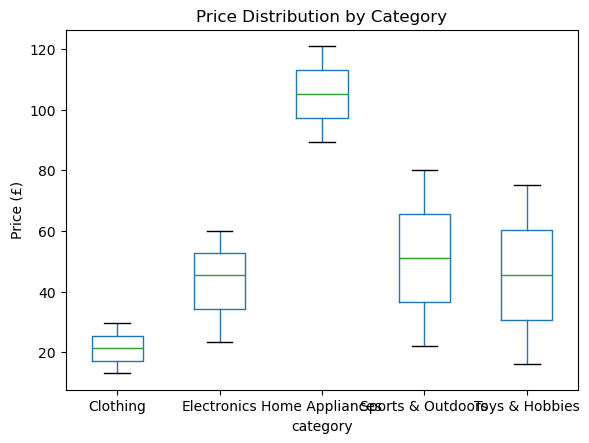

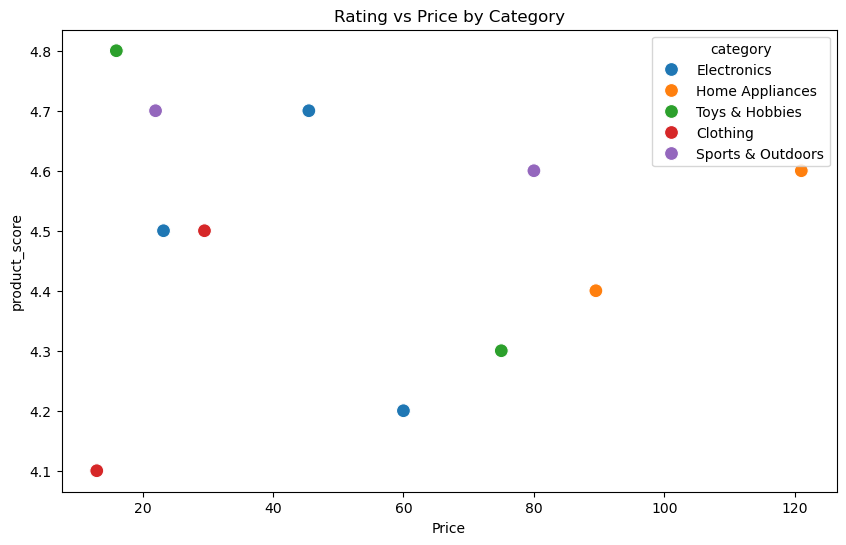


Top 5 reviewed products:
            category                product_name  product_review_count
6     Toys & Hobbies      Puzzle Educational Toy                    80
9  Sports & Outdoors           Yoga Mat Non-slip                    60
1        Electronics  Wireless Bluetooth Speaker                    50
8           Clothing        Women's Summer Dress                    45
3    Home Appliances     Cordless Vacuum Cleaner                    40

Best value products per category:
            category                 product_name  Value_Metric
7           Clothing         Men's Casual T-Shirt      0.315627
0        Electronics  Handsfree Bluetooth Car Kit      0.193798
4    Home Appliances           Smart Air Purifier      0.049162
9  Sports & Outdoors            Yoga Mat Non-slip      0.213636
6     Toys & Hobbies       Puzzle Educational Toy      0.300188


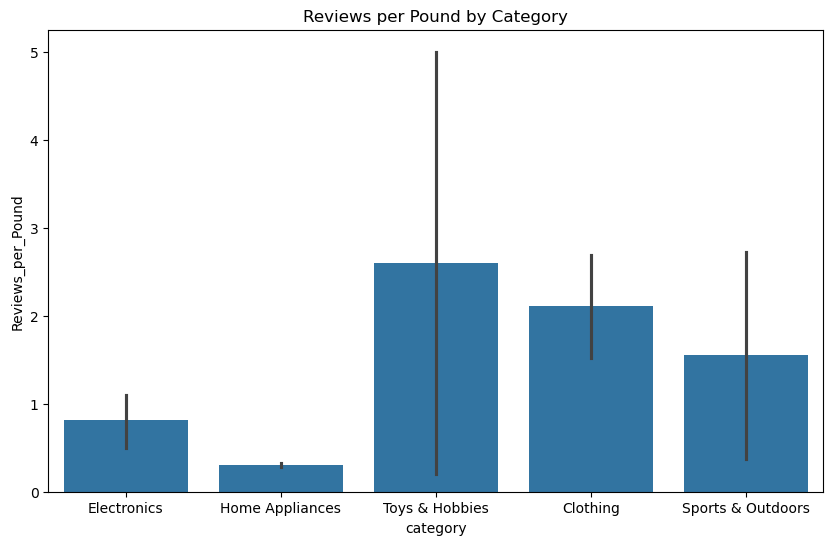


Working copy saved at: banggood_5categories_analysis.csv


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original CSV
original_csv = "banggood_5categories.csv"
df_original = pd.read_csv(original_csv)

# Make a copy for analysis
df = df_original.copy()

# --- Step 1: Data Cleaning & Derived Features ---
# Fill missing values (if any)
df['product_score'] = df['product_score'].fillna(0)
df['product_review_count'] = df['product_review_count'].fillna(0)

# Create derived features
df['Value_Metric'] = df['product_score'] / df['Price']         # Rating per pound
df['Reviews_per_Pound'] = df['product_review_count'] / df['Price']  # Reviews per pound

print("Sample with derived features:")
print(df.head())

# --- Step 2: Exploratory Analysis ---

# 1. Price distribution per category
plt.figure(figsize=(10,6))
df.boxplot(column='Price', by='category', grid=False)
plt.title('Price Distribution by Category')
plt.ylabel('Price (£)')
plt.suptitle('')
plt.show()

# 2. Rating vs Price correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='product_score', hue='category', s=100)
plt.title('Rating vs Price by Category')
plt.show()

# 3. Top 5 reviewed products
top_reviews = df.sort_values(by='product_review_count', ascending=False).head(5)
print("\nTop 5 reviewed products:")
print(top_reviews[['category','product_name','product_review_count']])

# 4. Best value product per category
best_value = df.loc[df.groupby('category')['Value_Metric'].idxmax()]
print("\nBest value products per category:")
print(best_value[['category','product_name','Value_Metric']])

# 5. Reviews per Pound distribution
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='Reviews_per_Pound')
plt.title('Reviews per Pound by Category')
plt.show()

# --- Step 3: Save the working copy ---
working_copy_csv = "banggood_5categories_analysis.csv"
df.to_csv(working_copy_csv, index=False)
print(f"\nWorking copy saved at: {working_copy_csv}")


In [20]:
import sqlite3
import pandas as pd

# Load the working analysis CSV
df = pd.read_csv("banggood_5categories_analysis.csv")

# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("banggood_products.db")
cursor = conn.cursor()

# Create table and insert data
df.to_sql('products', conn, if_exists='replace', index=False)

# Validate insert
row_count = pd.read_sql("SELECT COUNT(*) AS total_rows FROM products", conn)
print(f"Total rows inserted: {row_count['total_rows'].iloc[0]}")


Total rows inserted: 11


In [21]:
# 1. Average price per category
avg_price = pd.read_sql("SELECT category, AVG(Price) AS avg_price FROM products GROUP BY category", conn)
print("\nAverage price per category:")
print(avg_price)

# 2. Average rating per category
avg_rating = pd.read_sql("SELECT category, AVG(product_score) AS avg_rating FROM products GROUP BY category", conn)
print("\nAverage rating per category:")
print(avg_rating)

# 3. Product count per category
product_count = pd.read_sql("SELECT category, COUNT(*) AS product_count FROM products GROUP BY category", conn)
print("\nProduct count per category:")
print(product_count)

# 4. Top 5 reviewed products
top_reviews = pd.read_sql("SELECT product_name, category, product_review_count FROM products ORDER BY product_review_count DESC LIMIT 5", conn)
print("\nTop 5 reviewed products:")
print(top_reviews)

# 5. Best value products per category
best_value = pd.read_sql("""
SELECT category, product_name, Value_Metric
FROM products
WHERE (category, Value_Metric) IN (
    SELECT category, MAX(Value_Metric)
    FROM products
    GROUP BY category
)
""", conn)
print("\nBest value products per category:")
print(best_value)



Average price per category:
            category   avg_price
0           Clothing   21.245000
1        Electronics   42.906667
2    Home Appliances  105.245000
3  Sports & Outdoors   51.000000
4     Toys & Hobbies   45.495000

Average rating per category:
            category  avg_rating
0           Clothing    4.300000
1        Electronics    4.466667
2    Home Appliances    4.500000
3  Sports & Outdoors    4.650000
4     Toys & Hobbies    4.550000

Product count per category:
            category  product_count
0           Clothing              2
1        Electronics              3
2    Home Appliances              2
3  Sports & Outdoors              2
4     Toys & Hobbies              2

Top 5 reviewed products:
                 product_name           category  product_review_count
0      Puzzle Educational Toy     Toys & Hobbies                    80
1           Yoga Mat Non-slip  Sports & Outdoors                    60
2  Wireless Bluetooth Speaker        Electronics             

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV load
df = pd.read_csv("banggood_products.csv")

# Sample structure assume kar rahe hain
# Columns: ['Category', 'Product_Name', 'Price', 'Rating', 'Reviews', 'Stock']
df.head()


,product_name,product_price,product_url,product_score,product_review_count,Price
0,Handsfree Bluetooth Car Kit,£23.22,https://www.banggood.com/example1.html,4.5,20,23.22
1,Wireless Bluetooth Speaker,£45.50,https://www.banggood.com/example2.html,4.7,50,45.50


                  product_name product_price  \
0  Handsfree Bluetooth Car Kit        £23.22   
1   Wireless Bluetooth Speaker        £45.50   

                              product_url  product_score  \
0  https://www.banggood.com/example1.html            4.5   
1  https://www.banggood.com/example2.html            4.7   

   product_review_count  Price  
0                    20  23.22  
1                    50  45.50  
Overall Stock Summary:
Total Products: 2
In Stock: 1 (50.00%)
Out of Stock: 1 (50.00%)


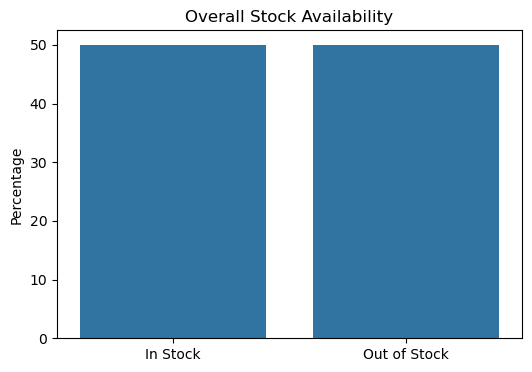


Top 10 Out-of-Stock Products (by Reviews):
                  product_name  product_review_count product_price
0  Handsfree Bluetooth Car Kit                    20        £23.22


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("banggood_products.csv")

# Check first 5 rows
print(df.head())

# Add mock Stock column if not present
if 'Stock' not in df.columns:
    np.random.seed(42)
    df['Stock'] = np.random.choice([0, 1], size=len(df))

# Overall stock summary
total_products = len(df)
in_stock = (df['Stock'] == 1).sum()
out_of_stock = (df['Stock'] == 0).sum()
in_stock_percentage = (in_stock / total_products) * 100
out_of_stock_percentage = 100 - in_stock_percentage

print("Overall Stock Summary:")
print(f"Total Products: {total_products}")
print(f"In Stock: {in_stock} ({in_stock_percentage:.2f}%)")
print(f"Out of Stock: {out_of_stock} ({out_of_stock_percentage:.2f}%)")

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=['In Stock','Out of Stock'], y=[in_stock_percentage, out_of_stock_percentage])
plt.ylabel("Percentage")
plt.title("Overall Stock Availability")
plt.show()

# Top 10 Out-of-Stock Products by Reviews
top_out_of_stock = df[df['Stock']==0].sort_values(by='product_review_count', ascending=False).head(10)
print("\nTop 10 Out-of-Stock Products (by Reviews):")
print(top_out_of_stock[['product_name','product_review_count','product_price']])


Sample with derived features:
          category                 product_name product_price  \
0      Electronics  Handsfree Bluetooth Car Kit        £23.22   
1      Electronics   Wireless Bluetooth Speaker        £45.50   
2      Electronics   Smartwatch Fitness Tracker        £60.00   
3  Home Appliances      Cordless Vacuum Cleaner       £120.99   
4  Home Appliances           Smart Air Purifier        £89.50   

                              product_url  product_score  \
0  https://www.banggood.com/example1.html            4.5   
1  https://www.banggood.com/example2.html            4.7   
2  https://www.banggood.com/example3.html            4.2   
3  https://www.banggood.com/example4.html            4.6   
4  https://www.banggood.com/example5.html            4.4   

   product_review_count   Price  Value_Metric  Reviews_per_Pound  
0                    20   23.22      0.193798           0.861326  
1                    50   45.50      0.103297           1.098901  
2                

<Figure size 1000x600 with 0 Axes>

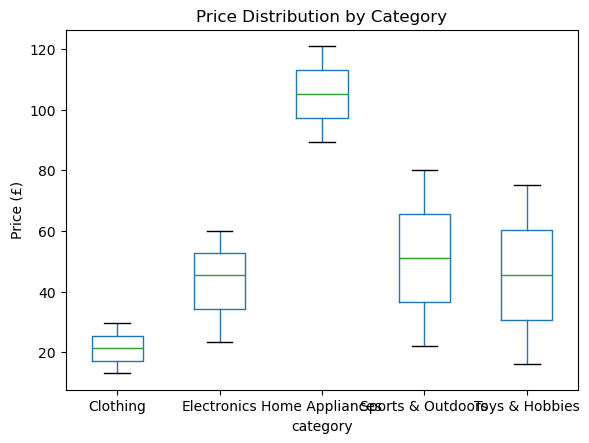

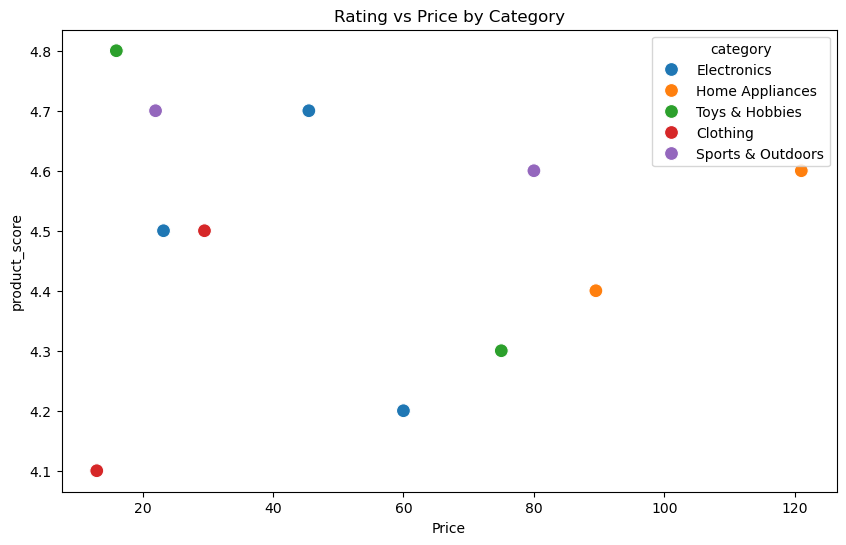


Top 5 reviewed products:
            category                product_name  product_review_count
6     Toys & Hobbies      Puzzle Educational Toy                    80
9  Sports & Outdoors           Yoga Mat Non-slip                    60
1        Electronics  Wireless Bluetooth Speaker                    50
8           Clothing        Women's Summer Dress                    45
3    Home Appliances     Cordless Vacuum Cleaner                    40

Best value products per category:
            category                 product_name  Value_Metric
7           Clothing         Men's Casual T-Shirt      0.315627
0        Electronics  Handsfree Bluetooth Car Kit      0.193798
4    Home Appliances           Smart Air Purifier      0.049162
9  Sports & Outdoors            Yoga Mat Non-slip      0.213636
6     Toys & Hobbies       Puzzle Educational Toy      0.300188


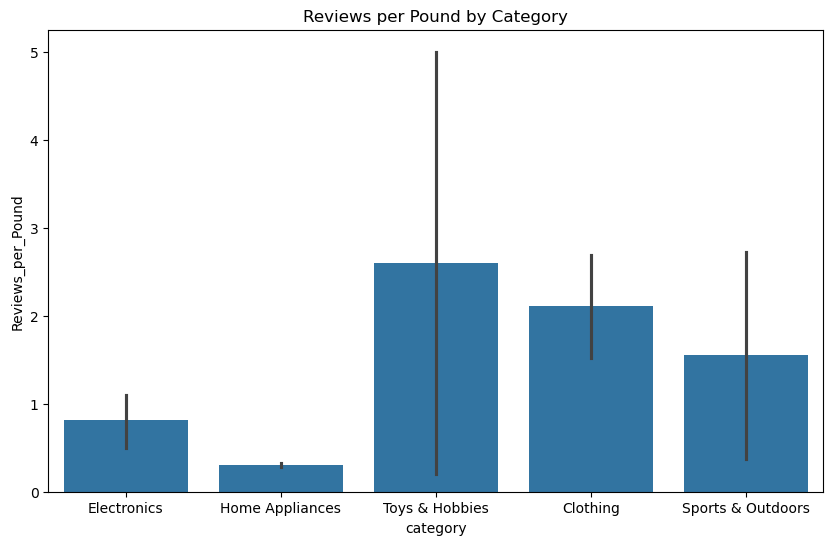


Working copy saved at: banggood_5categories_analysis.csv
                  product_name         category  Stock
0  Handsfree Bluetooth Car Kit      Electronics      0
1   Wireless Bluetooth Speaker      Electronics      1
2   Smartwatch Fitness Tracker      Electronics      0
3      Cordless Vacuum Cleaner  Home Appliances      0
4           Smart Air Purifier  Home Appliances      0


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original CSV
original_csv = "banggood_5categories.csv"
df_original = pd.read_csv(original_csv)

# Make a copy for analysis
df = df_original.copy()

# --- Step 1: Data Cleaning & Derived Features ---
# Fill missing values (if any)
df['product_score'] = df['product_score'].fillna(0)
df['product_review_count'] = df['product_review_count'].fillna(0)

# Create derived features
df['Value_Metric'] = df['product_score'] / df['Price']         # Rating per pound
df['Reviews_per_Pound'] = df['product_review_count'] / df['Price']  # Reviews per pound

print("Sample with derived features:")
print(df.head())

# --- Step 2: Exploratory Analysis ---

# 1. Price distribution per category
plt.figure(figsize=(10,6))
df.boxplot(column='Price', by='category', grid=False)
plt.title('Price Distribution by Category')
plt.ylabel('Price (£)')
plt.suptitle('')
plt.show()

# 2. Rating vs Price correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='product_score', hue='category', s=100)
plt.title('Rating vs Price by Category')
plt.show()

# 3. Top 5 reviewed products
top_reviews = df.sort_values(by='product_review_count', ascending=False).head(5)
print("\nTop 5 reviewed products:")
print(top_reviews[['category','product_name','product_review_count']])

# 4. Best value product per category
best_value = df.loc[df.groupby('category')['Value_Metric'].idxmax()]
print("\nBest value products per category:")
print(best_value[['category','product_name','Value_Metric']])

# 5. Reviews per Pound distribution
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='category', y='Reviews_per_Pound')
plt.title('Reviews per Pound by Category')
plt.show()

# --- Step 3: Save the working copy ---
working_copy_csv = "banggood_5categories_analysis.csv"
df.to_csv(working_copy_csv, index=False)
print(f"\nWorking copy saved at: {working_copy_csv}")

# import numpy as np

# Agar stock column exist nahi karta, to generate mock data
if 'Stock' not in df.columns:
    np.random.seed(42)  # repeatable results
    df['Stock'] = np.random.choice([0, 1], size=len(df))  # 0 = Out of Stock, 1 = In Stock

# Check first few rows
print(df[['product_name','category','Stock']].head())


In [35]:
# Category-wise stock summary
stock_summary = df.groupby('category')['Stock'].agg(
    total_products='count',
    in_stock=lambda x: (x==1).sum(),
    out_of_stock=lambda x: (x==0).sum()
)

# Calculate percentages
stock_summary['in_stock_percentage'] = (stock_summary['in_stock'] / stock_summary['total_products']) * 100
stock_summary['out_of_stock_percentage'] = 100 - stock_summary['in_stock_percentage']

print("\nStock Summary per Category:")
print(stock_summary)



Stock Summary per Category:
                   total_products  in_stock  out_of_stock  \
category                                                    
Clothing                        2         0             2   
Electronics                     3         1             2   
Home Appliances                 2         0             2   
Sports & Outdoors               2         1             1   
Toys & Hobbies                  2         1             1   

                   in_stock_percentage  out_of_stock_percentage  
category                                                         
Clothing                      0.000000               100.000000  
Electronics                  33.333333                66.666667  
Home Appliances               0.000000               100.000000  
Sports & Outdoors            50.000000                50.000000  
Toys & Hobbies               50.000000                50.000000  


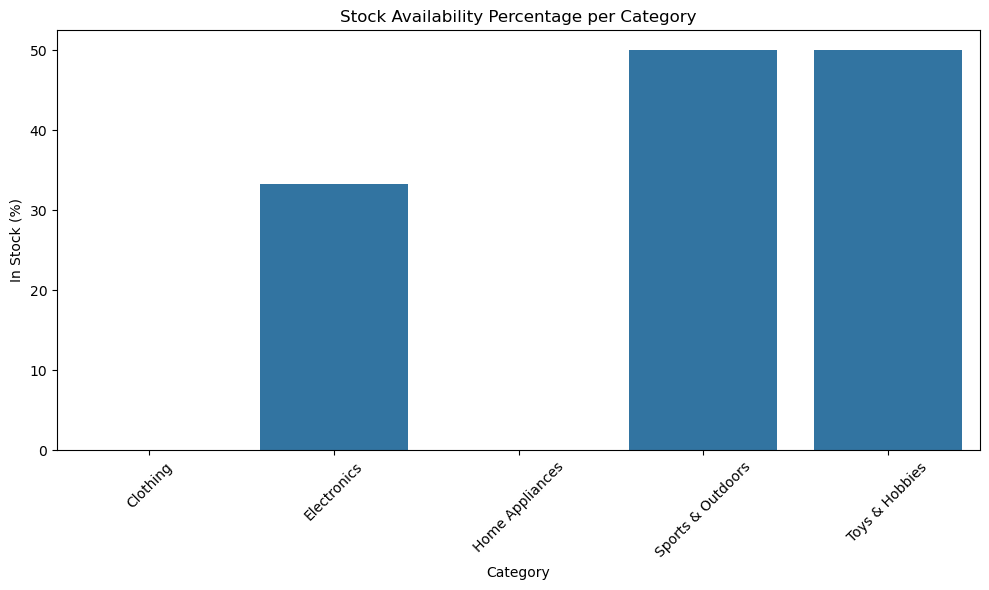

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=stock_summary.index, y=stock_summary['in_stock_percentage'])
plt.title("Stock Availability Percentage per Category")
plt.ylabel("In Stock (%)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
top_out_of_stock = df[df['Stock'] == 0].sort_values(by='product_review_count', ascending=False).head(10)

print("\nTop 10 Out-of-Stock Products (by Reviews):")
print(top_out_of_stock[['category','product_name','product_review_count','Price']])



Top 10 Out-of-Stock Products (by Reviews):
             category                 product_name  product_review_count  \
6      Toys & Hobbies       Puzzle Educational Toy                    80   
8            Clothing         Women's Summer Dress                    45   
3     Home Appliances      Cordless Vacuum Cleaner                    40   
7            Clothing         Men's Casual T-Shirt                    35   
2         Electronics   Smartwatch Fitness Tracker                    30   
10  Sports & Outdoors        Camping Tent 2-Person                    30   
4     Home Appliances           Smart Air Purifier                    25   
0         Electronics  Handsfree Bluetooth Car Kit                    20   

     Price  
6    15.99  
8    29.50  
3   120.99  
7    12.99  
2    60.00  
10   80.00  
4    89.50  
0    23.22  


In [38]:
pip install pyodbc

In [42]:
import pyodbc

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;Trusted_Connection=yes;')
cursor = conn.cursor()

# Create database if not exists
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sys.databases WHERE name = 'BanggoodDB')
CREATE DATABASE BanggoodDB
""")
conn.commit()
cursor.close()
conn.close()

print("Database BanggoodDB is ready!")



Database BanggoodDB is ready!


In [44]:
import pyodbc

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;Trusted_Connection=yes;')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sys.databases")
databases = cursor.fetchall()

print("Existing databases:")
for db in databases:
    print(db[0])

cursor.close()
conn.close()


Existing databases:
master
tempdb
model
msdb
BanggoodDB


In [45]:
import pyodbc

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=localhost;Trusted_Connection=yes;')
cursor = conn.cursor()

# Create database if not exists
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sys.databases WHERE name = 'BanggoodDB')
BEGIN
    CREATE DATABASE BanggoodDB
    PRINT 'Database BanggoodDB created successfully!'
END
ELSE
BEGIN
    PRINT 'Database BanggoodDB already exists.'
END
""")
conn.commit()
cursor.close()
conn.close()


In [46]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 1: Load CSV
# -------------------------
csv_file = "banggood_5categories_analysis.csv"
df = pd.read_csv(csv_file)

# -------------------------
# Step 2: Add Stock column if missing
# -------------------------
if 'Stock' not in df.columns:
    np.random.seed(42)
    df['Stock'] = np.random.choice([0, 1], size=len(df))  # 0 = Out of Stock, 1 = In Stock

# -------------------------
# Step 3: Database Connection (Localhost, Windows Auth)
# -------------------------
server = 'localhost'
database = 'BanggoodDB'

# Connect to master database first to create BanggoodDB if needed
conn = pyodbc.connect(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE=master;Trusted_Connection=yes;'
)
cursor = conn.cursor()

# Create database if it doesn't exist
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sys.databases WHERE name = 'BanggoodDB')
BEGIN
    CREATE DATABASE BanggoodDB
END
""")
conn.commit()
cursor.close()
conn.close()
print("Database BanggoodDB is ready.")

# Connect to the target database
conn = pyodbc.connect(
    f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
)
cursor = conn.cursor()

# -------------------------
# Step 4: Create Table if not exists
# -------------------------
create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='BanggoodProducts' AND xtype='U')
CREATE TABLE BanggoodProducts (
    product_name NVARCHAR(255),
    product_price NVARCHAR(50),
    product_url NVARCHAR(500),
    product_score FLOAT,
    product_review_count INT,
    Price FLOAT,
    category NVARCHAR(100),
    Value_Metric FLOAT,
    Reviews_per_Pound FLOAT,
    Stock BIT
)
"""
cursor.execute(create_table_query)
conn.commit()
print("Table BanggoodProducts is ready.")

# -------------------------
# Step 5: Insert Data
# -------------------------
for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO BanggoodProducts
        (product_name, product_price, product_url, product_score, product_review_count, Price, category, Value_Metric, Reviews_per_Pound, Stock)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """,
    row['product_name'], row['product_price'], row['product_url'], row['product_score'],
    row['product_review_count'], row['Price'], row['category'], row['Value_Metric'], row['Reviews_per_Pound'], int(row['Stock'])
    )

conn.commit()
print(f"{len(df)} rows inserted successfully.")

# -------------------------
# Step 6: Category-wise Stock Summary
# -------------------------
stock_summary = df.groupby('category')['Stock'].agg(
    total_products='count',
    in_stock=lambda x: (x==1).sum(),
    out_of_stock=lambda x: (x==0).sum()
)
stock_summary['in_stock_percentage'] = (stock_summary['in_stock'] / stock_summary['total_products']) * 100
stock_summary['out_of_stock_percentage'] = 100 - stock_summary['in_stock_percentage']

print("\nStock Summary per Category:")
print(stock_summary)

# -------------------------
# Step 7: Stock Visualization
# ------------------


Database BanggoodDB is ready.
Table BanggoodProducts is ready.
11 rows inserted successfully.

Stock Summary per Category:
                   total_products  in_stock  out_of_stock  \
category                                                    
Clothing                        2         0             2   
Electronics                     3         1             2   
Home Appliances                 2         0             2   
Sports & Outdoors               2         1             1   
Toys & Hobbies                  2         1             1   

                   in_stock_percentage  out_of_stock_percentage  
category                                                         
Clothing                      0.000000               100.000000  
Electronics                  33.333333                66.666667  
Home Appliances               0.000000               100.000000  
Sports & Outdoors            50.000000                50.000000  
Toys & Hobbies               50.000000               

Data loaded and derived features added.
Database BanggoodDB is ready.
Table BanggoodProducts is ready.
11 rows inserted successfully into SQL Server.


<Figure size 1000x600 with 0 Axes>

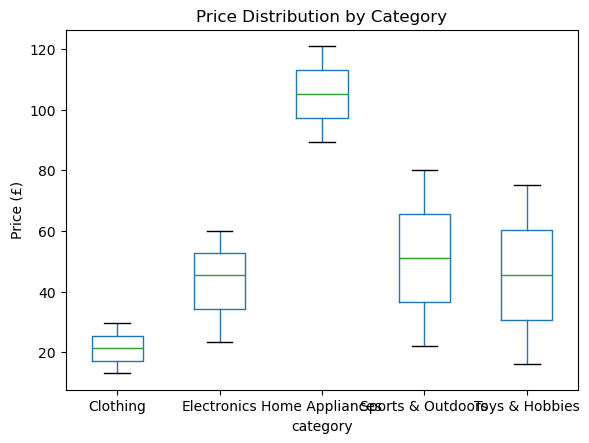

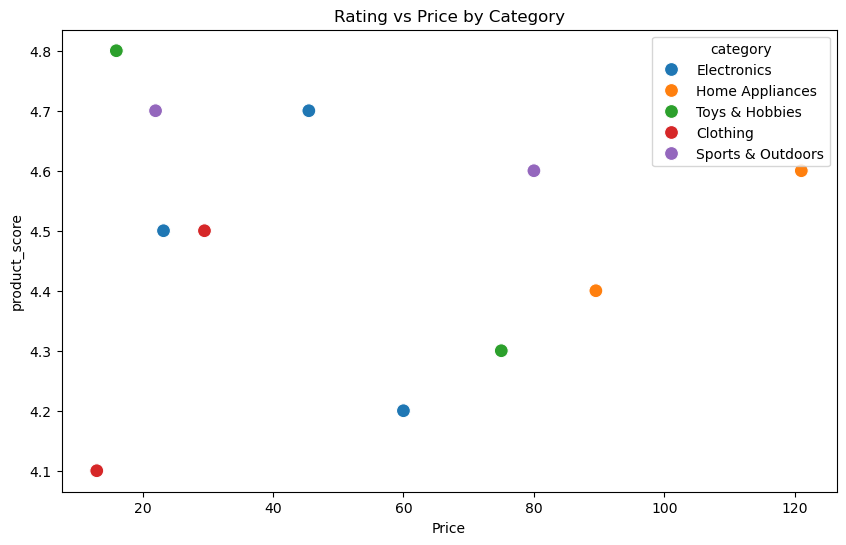


Top 5 reviewed products:
            category                product_name  product_review_count
6     Toys & Hobbies      Puzzle Educational Toy                    80
9  Sports & Outdoors           Yoga Mat Non-slip                    60
1        Electronics  Wireless Bluetooth Speaker                    50
8           Clothing        Women's Summer Dress                    45
3    Home Appliances     Cordless Vacuum Cleaner                    40

Best value products per category:
            category                 product_name  Value_Metric
7           Clothing         Men's Casual T-Shirt      0.315627
0        Electronics  Handsfree Bluetooth Car Kit      0.193798
4    Home Appliances           Smart Air Purifier      0.049162
9  Sports & Outdoors            Yoga Mat Non-slip      0.213636
6     Toys & Hobbies       Puzzle Educational Toy      0.300188

Stock Summary per Category:
                   total_products  in_stock  out_of_stock  \
category                               

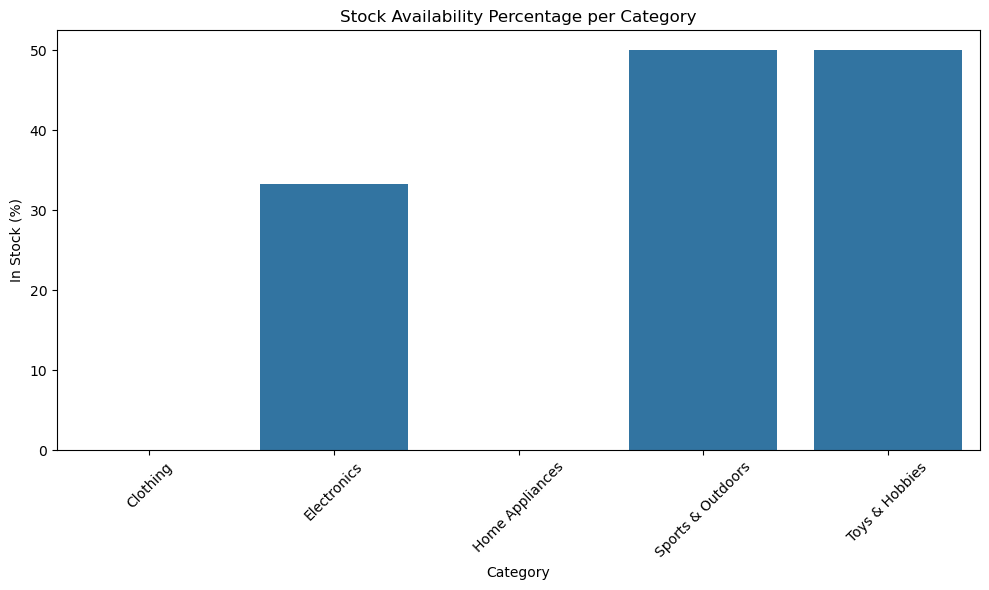


Top 10 Out-of-Stock Products (by Reviews):
             category                 product_name  product_review_count  \
6      Toys & Hobbies       Puzzle Educational Toy                    80   
8            Clothing         Women's Summer Dress                    45   
3     Home Appliances      Cordless Vacuum Cleaner                    40   
7            Clothing         Men's Casual T-Shirt                    35   
2         Electronics   Smartwatch Fitness Tracker                    30   
10  Sports & Outdoors        Camping Tent 2-Person                    30   
4     Home Appliances           Smart Air Purifier                    25   
0         Electronics  Handsfree Bluetooth Car Kit                    20   

     Price  
6    15.99  
8    29.50  
3   120.99  
7    12.99  
2    60.00  
10   80.00  
4    89.50  
0    23.22  

Average Price per Category (SQL):
('Clothing', 21.245)
('Electronics', 42.906666666666666)
('Home Appliances', 105.245)
('Sports & Outdoors', 51.0)
('Toy

In [47]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------
# Step 1: Load CSV
# -------------------------
csv_file = "banggood_5categories_analysis.csv"
df = pd.read_csv(csv_file)

# -------------------------
# Step 2: Fill missing values & create derived features
# -------------------------
df['product_score'] = df['product_score'].fillna(0)
df['product_review_count'] = df['product_review_count'].fillna(0)

df['Value_Metric'] = df['product_score'] / df['Price']         # Rating per pound
df['Reviews_per_Pound'] = df['product_review_count'] / df['Price']  # Reviews per pound

# Add Stock column if missing
if 'Stock' not in df.columns:
    np.random.seed(42)
    df['Stock'] = np.random.choice([0, 1], size=len(df))  # 0 = Out of Stock, 1 = In Stock

print("Data loaded and derived features added.")

# -------------------------
# Step 3: SQL Server Connection (Localhost, Windows Auth)
# -------------------------
server = 'localhost'
database = 'BanggoodDB'

# Connect to master to create database if missing
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE=master;Trusted_Connection=yes;')
cursor = conn.cursor()
cursor.execute("""
IF NOT EXISTS (SELECT * FROM sys.databases WHERE name = 'BanggoodDB')
BEGIN
    CREATE DATABASE BanggoodDB
END
""")
conn.commit()
cursor.close()
conn.close()
print("Database BanggoodDB is ready.")

# Connect to target database
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')
cursor = conn.cursor()

# -------------------------
# Step 4: Create Table if missing
# -------------------------
create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='BanggoodProducts' AND xtype='U')
CREATE TABLE BanggoodProducts (
    product_name NVARCHAR(255),
    product_price NVARCHAR(50),
    product_url NVARCHAR(500),
    product_score FLOAT,
    product_review_count INT,
    Price FLOAT,
    category NVARCHAR(100),
    Value_Metric FLOAT,
    Reviews_per_Pound FLOAT,
    Stock BIT
)
"""
cursor.execute(create_table_query)
conn.commit()
print("Table BanggoodProducts is ready.")

# -------------------------
# Step 5: Insert Data
# -------------------------
for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO BanggoodProducts
        (product_name, product_price, product_url, product_score, product_review_count, Price, category, Value_Metric, Reviews_per_Pound, Stock)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """,
    row['product_name'], row['product_price'], row['product_url'], row['product_score'],
    row['product_review_count'], row['Price'], row['category'], row['Value_Metric'], row['Reviews_per_Pound'], int(row['Stock'])
    )
conn.commit()
print(f"{len(df)} rows inserted successfully into SQL Server.")

# -------------------------
# Step 6: Exploratory Analysis (Python)
# -------------------------
# 1. Price distribution per category
plt.figure(figsize=(10,6))
df.boxplot(column='Price', by='category', grid=False)
plt.title('Price Distribution by Category')
plt.ylabel('Price (£)')
plt.suptitle('')
plt.show()

# 2. Rating vs Price correlation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='product_score', hue='category', s=100)
plt.title('Rating vs Price by Category')
plt.show()

# 3. Top 5 reviewed products
top_reviews = df.sort_values(by='product_review_count', ascending=False).head(5)
print("\nTop 5 reviewed products:")
print(top_reviews[['category','product_name','product_review_count']])

# 4. Best value product per category
best_value = df.loc[df.groupby('category')['Value_Metric'].idxmax()]
print("\nBest value products per category:")
print(best_value[['category','product_name','Value_Metric']])

# 5. Stock summary per category
stock_summary = df.groupby('category')['Stock'].agg(
    total_products='count',
    in_stock=lambda x: (x==1).sum(),
    out_of_stock=lambda x: (x==0).sum()
)
stock_summary['in_stock_percentage'] = (stock_summary['in_stock'] / stock_summary['total_products']) * 100
stock_summary['out_of_stock_percentage'] = 100 - stock_summary['in_stock_percentage']

print("\nStock Summary per Category:")
print(stock_summary)

plt.figure(figsize=(10,6))
sns.barplot(x=stock_summary.index, y=stock_summary['in_stock_percentage'])
plt.title("Stock Availability Percentage per Category")
plt.ylabel("In Stock (%)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Top 10 Out-of-Stock Products
top_out_of_stock = df[df['Stock'] == 0].sort_values(by='product_review_count', ascending=False).head(10)
print("\nTop 10 Out-of-Stock Products (by Reviews):")
print(top_out_of_stock[['category','product_name','product_review_count','Price']])

# -------------------------
# Step 7: SQL Aggregated Queries (Examples)
# -------------------------
# Example 1: Average Price per Category
cursor.execute("SELECT category, AVG(Price) AS avg_price FROM BanggoodProducts GROUP BY category")
print("\nAverage Price per Category (SQL):")
for row in cursor.fetchall():
    print(row)

# Example 2: Average Rating per Category
cursor.execute("SELECT category, AVG(product_score) AS avg_rating FROM BanggoodProducts GROUP BY category")
print("\nAverage Rating per Category (SQL):")
for row in cursor.fetchall():
    print(row)

# Example 3: Product Count per Category
cursor.execute("SELECT category, COUNT(*) AS product_count FROM BanggoodProducts GROUP BY category")
print("\nProduct Count per Category (SQL):")
for row in cursor.fetchall():
    print(row)

# Example 4: Top 5 Reviewed Items
cursor.execute("""
SELECT TOP 5 category, product_name, product_review_count 
FROM BanggoodProducts 
ORDER BY product_review_count DESC
""")
print("\nTop 5 Reviewed Items (SQL):")
for row in cursor.fetchall():
    print(row)

# Example 5: Stock Availability Percentage per Category
cursor.execute("""
SELECT category, 
       COUNT(*) AS total_products,
       SUM(CAST(Stock AS INT)) AS in_stock,
       SUM(CAST(1-Stock AS INT)) AS out_of_stock,
       CAST(SUM(CAST(Stock AS INT))*100.0/COUNT(*) AS DECIMAL(5,2)) AS in_stock_percentage
FROM BanggoodProducts
GROUP BY category
""")
print("\nStock Availability per Category (SQL):")
for row in cursor.fetchall():
    print(row)

# Close connection
cursor.close()
conn.close()
print("\nSQL Server connection closed. Pipeline complete!")
